In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("stanfordtrain.csv")

In [15]:
df.head()

sentiment      Number                          Date     Query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

          Username                                               Text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [16]:
df.columns

Index(['sentiment', 'Number', 'Date', 'Query', 'Username', 'Text'], dtype='object')

In [17]:
tweet_df = df[['sentiment','Text']]
print(tweet_df.shape)
tweet_df.head(5)

(10000, 2)


sentiment                                               Text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....

In [ ]:
#tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
#print(tweet_df.shape)
#tweet_df.head(5)

In [18]:
tweet_df["sentiment"].value_counts()

0    5000
4    5000
Name: sentiment, dtype: int64

In [19]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]), Int64Index([0, 4], dtype='int64'))

In [20]:
tweet = tweet_df.Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [21]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'and': 5, 'my': 6, 'you': 7, 'is': 8, 'it': 9, 'for': 10, 'in': 11, 'of': 12, 'on': 13, 'me': 14, 'that': 15, 'have': 16, 'but': 17, 'so': 18, 'just': 19, "i'm": 20, 'at': 21, 'not': 22, 'with': 23, 'be': 24, 'this': 25, 'up': 26, 'was': 27, 'now': 28, 'good': 29, 'all': 30, 'day': 31, 'like': 32, 'quot': 33, 'work': 34, 'get': 35, 'are': 36, 'out': 37, 'do': 38, 'http': 39, "it's": 40, 'too': 41, 'no': 42, 'today': 43, 'go': 44, 'going': 45, 'your': 46, 'com': 47, 'time': 48, 'one': 49, 'from': 50, 'what': 51, 'love': 52, 'got': 53, 'lol': 54, 'will': 55, 'back': 56, 'am': 57, 'some': 58, 'morning': 59, "don't": 60, 'know': 61, "can't": 62, 'about': 63, 'sleep': 64, 'can': 65, 'night': 66, 'as': 67, 'we': 68, 'twitter': 69, 'amp': 70, 'if': 71, 'really': 72, 'new': 73, 'its': 74, 'still': 75, 'had': 76, 'an': 77, 'how': 78, 'well': 79, 'im': 80, 'u': 81, 'off': 82, 'see': 83, 'more': 84, 'need': 85, 'oh': 86, 'has': 87, '2': 88, 'thanks': 89, 'want'

In [22]:
print(tweet[0])
print(encoded_docs[0])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
[39, 149, 47, 444, 129, 4, 2078, 7, 3959, 53, 794, 12, 1468, 31, 2, 38, 9, 412]


In [23]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   39  149   47  444  129    4 2078    7 3959   53  794   12 1468   31
    2 

In [24]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           592704    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 609,355
Trainable params: 609,355
Non-trainable params: 0
________________________________________________

In [25]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
250/250 [==============================] - 83s 317ms/step - loss: 0.6323 - accuracy: 0.6475 - precision: 0.6673 - recall: 0.1197 - val_loss: 0.8897 - val_accuracy: 0.3405 - val_precision: 1.0000 - val_recall: 0.3405
Epoch 2/5
250/250 [==============================] - 73s 290ms/step - loss: 0.4970 - accuracy: 0.7676 - precision: 0.7270 - recall: 0.6090 - val_loss: 0.7308 - val_accuracy: 0.6275 - val_precision: 1.0000 - val_recall: 0.6275
Epoch 3/5
250/250 [==============================] - 74s 294ms/step - loss: 0.4179 - accuracy: 0.8159 - precision: 0.7743 - recall: 0.7183 - val_loss: 0.8390 - val_accuracy: 0.6105 - val_precision: 1.0000 - val_recall: 0.6105
Epoch 4/5
250/250 [==============================] - 74s 296ms/step - loss: 0.3730 - accuracy: 0.8403 - precision: 0.8019 - recall: 0.7623 - val_loss: 0.7813 - val_accuracy: 0.6490 - val_precision: 1.0000 - val_recall: 0.6490
Epoch 5/5
250/250 [==============================] - 72s 286ms/step - loss: 0.3392 - accuracy: 0

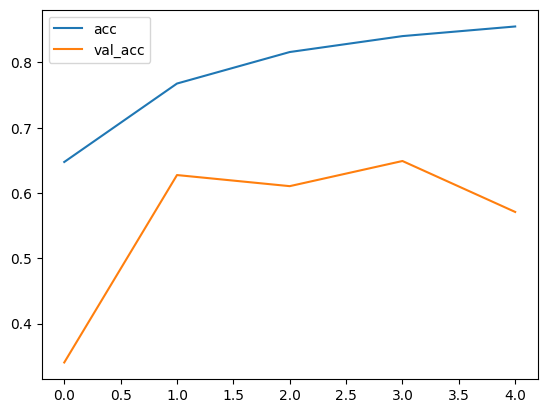

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

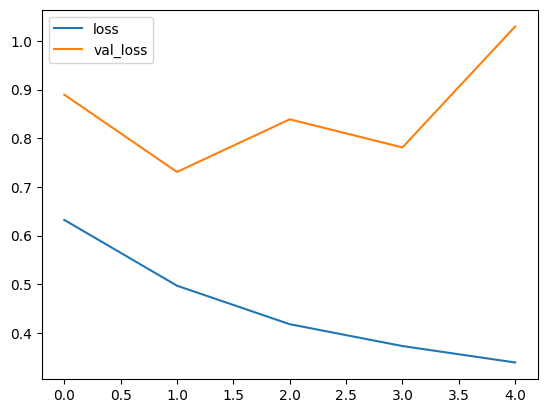

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [28]:
def predict_sentiment(array):
    tw = tokenizer.texts_to_sequences([array])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    #print("Predicted label: ", sentiment_label[1][prediction])
    pred = sentiment_label[1][prediction]
    return pred

1/1 [==============================] - 0s 47ms/step
86
138
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


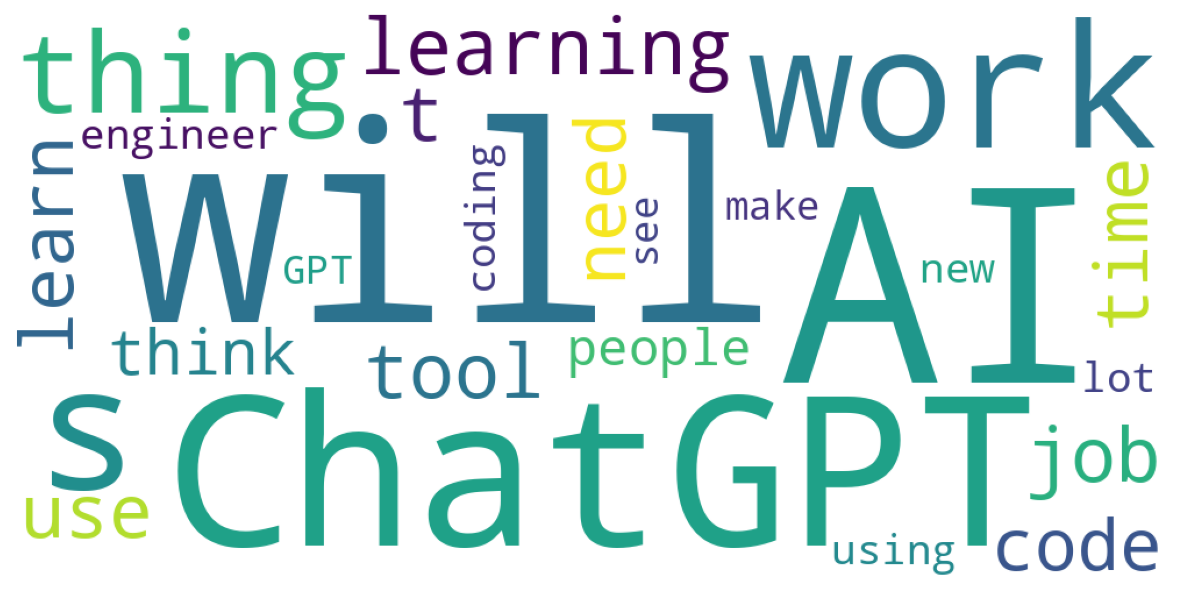

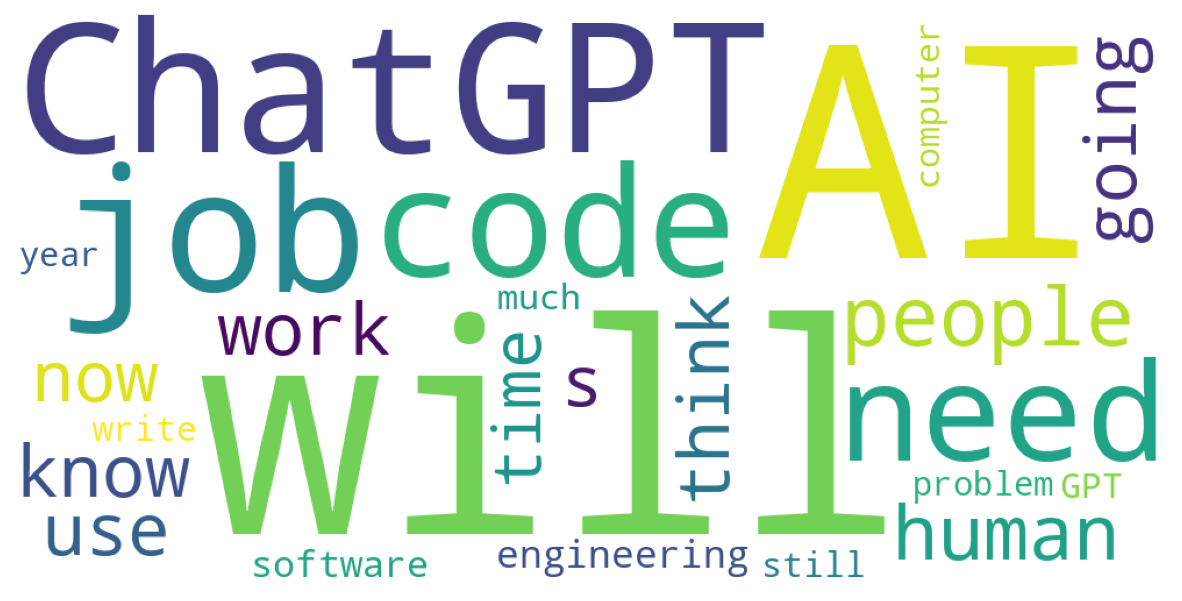

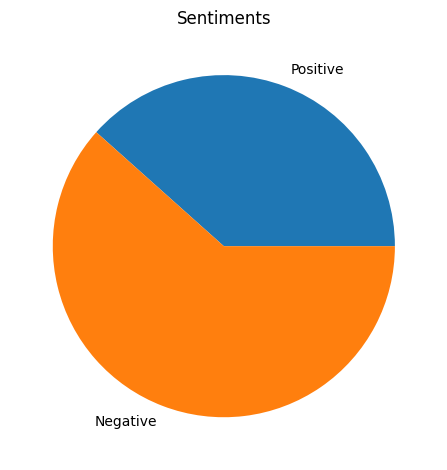

In [29]:
from os import pwrite
#test_sentence1 = "I enjoyed my journey on this flight."
#predict_sentiment(test_sentence1)

#test_sentence2 = "This is the worst thing!"
#predict_sentiment(test_sentence2)

dft = pd.read_csv("testingsample.csv")
text2 = dft["Text"]
pos = 0
neg = 0

import csv 
pw = []
nw = []
for row in text2:
  #print(row)
  predval = predict_sentiment(row)
  if predval == 4:
    pos = pos + 1 
    pw.append(row)  
  else: 
    neg = neg + 1
    nw.append(row)
   
print(pos)
print(neg)

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS.copy()

#convert list to string and generate
unique_string=(" ").join(pw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

unique_=(" ").join(nw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_namei"+".png", bbox_inches='tight')
plt.show()
plt.close()

import numpy as np
#y = np.array([pos, neg])
#mylabels = ["Positive, Negative"]
#plt.pie(y, labels = mylabels)
#plt.show() 

x = [pos, neg]
mylabels = ['Positive', 'Negative']

fig, ax = plt.subplots()
ax.pie(x, labels=mylabels)
ax.set_title('Sentiments')
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')